In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob 
from os.path import basename
import math
import os

# QTLs with no confidence interval computed

In [3]:
z_dir="/u/home/j/jzou1115/project-zarlab/CFW/MegaAnalysis_CFW_2019_Summary_Statistics/COMBINED"
ld_dir="/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA"

In [4]:
ld_files = glob.glob(ld_dir+"/*")
ld_files

['/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/bmd_chr11_96912238_r2.txt',
 '/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/gastroc_chr11_88973192_r2.txt',
 '/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/bmd_chr5_23814155_r2.txt',
 '/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/TA_chr11_88973232_r2.txt',
 '/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/glucose_chr1_152192170_r2.txt',
 '/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/soleus_chr13_113404971_r2.txt',
 '/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/tibia_chr12_83514944_r2.txt']

In [6]:
[ basename(f) for f in ld_files]

['bmd_chr11_96912238_r2.txt',
 'gastroc_chr11_88973192_r2.txt',
 'bmd_chr5_23814155_r2.txt',
 'TA_chr11_88973232_r2.txt',
 'glucose_chr1_152192170_r2.txt',
 'soleus_chr13_113404971_r2.txt',
 'tibia_chr12_83514944_r2.txt']

In [9]:
f = ld_files[0]
pheno="bmd"
chrm = "chr11"
bp=96912238
dist_threshold=5000000
start_ci = max(0, bp - dist_threshold)
end_ci = bp + dist_threshold
ld = pd.read_table(f)
ld.head()

,snp1,snp2,rsquare
0,chr11_92663897,chr11_96912238,0.000395
1,chr11_92663910,chr11_96912238,0.000392
2,chr11_92689710,chr11_96912238,0.006694
3,chr11_92701989,chr11_96912238,0.003013
4,chr11_92702558,chr11_96912238,0.006766


In [10]:
ld.shape

(24757, 3)

In [12]:
z = pd.read_table(z_dir+"/bmd.combined.assoc.txt.gz", index_col=1)
z.head()

,chr,ps,n_miss,allele1,allele0,af,beta,se,l_remle,l_mle,p_wald,p_lrt,p_score
rs,,,,,,,,,,,,,
chr1_4118414,1,4118414,0,C,A,0.003,3.835485,3.722942,0.988758,0.984625,0.302992,0.302480,0.302645
chr1_5151352,1,5151352,0,T,G,0.555,-0.026541,0.029567,0.988369,0.984170,0.369432,0.368852,0.369027
chr1_5154957,1,5154957,0,C,T,0.543,-0.027417,0.029008,0.988758,0.984569,0.344665,0.344125,0.344283
chr1_5155818,1,5155818,0,T,C,0.557,-0.027287,0.028926,0.988383,0.984186,0.345591,0.345026,0.345203
chr1_5155866,1,5155866,0,A,G,0.559,-0.027474,0.029105,0.988383,0.984185,0.345260,0.344695,0.344872


In [14]:
snps = set(ld["snp1"]).intersection(set(z.index))
print(len(snps))

24421


In [18]:
ld.index = ld["snp1"]
ld = ld.loc[snps, :]
z = z.loc[snps, :]

In [19]:
ld.shape

(24421, 3)

In [20]:
z.shape

(24421, 13)

In [21]:
z["logp"] = -np.log10(z["p_wald"])

In [23]:
z["rsquare"] = ld["rsquare"]

Text(0.5, 1.0, 'bmd_chr11_96912238')

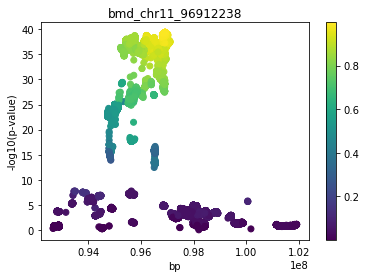

In [28]:
plt.scatter("ps", "logp", c="rsquare", data=z)
plt.colorbar()
plt.xlabel("bp")
plt.ylabel("-log10(p-value)")
plt.title(pheno+"_"+chrm+"_"+str(bp))

In [32]:
def plot_locus(ldFile, zFile, title, outFile):
    ld = pd.read_table(ldFile)
    z = pd.read_table(zFile, index_col=1)
    snps = set(ld["snp1"]).intersection(set(z.index))
    ld.index = ld["snp1"]
    ld = ld.loc[snps, :]
    z = z.loc[snps, :]
    z["logp"] = -np.log10(z["p_wald"])
    z["rsquare"] = ld["rsquare"]
    z["mb"] = z["ps"]/1000000
    
    plt.scatter("mb", "logp", c="rsquare", data=z)
    plt.colorbar()
    plt.xlabel("Position (MB)")
    plt.ylabel("-log10(p-value)")
    plt.title(pheno+"_"+chrm+"_"+str(bp))
    plt.savefig(outFile)
    plt.clf()

In [38]:
for f in ld_files:
    print(f)
    baseF = f.split("/")[-1]
    tokens = baseF.split("_")
    pheno = tokens[0]
    chrm = tokens[1]
    bp = tokens[2]
    
    zFile = z_dir+"/"+pheno+".combined.assoc.txt.gz"
    title = pheno+"_"+chrm+"_"+str(bp)
    outFile = ld_dir+"/"+title+".pdf"
    
    plot_locus(f, zFile, title, outFile)

/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/bmd_chr11_96912238_r2.txt
/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/gastroc_chr11_88973192_r2.txt
/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/bmd_chr5_23814155_r2.txt
/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/TA_chr11_88973232_r2.txt
/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/glucose_chr1_152192170_r2.txt
/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/soleus_chr13_113404971_r2.txt
/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/tibia_chr12_83514944_r2.txt


<Figure size 432x288 with 0 Axes>

# QTLs with confidence interval computed

In [2]:
z_dir="/u/home/j/jzou1115/project-zarlab/CFW/MegaAnalysis_CFW_2019_Summary_Statistics/COMBINED"
ld_dir="/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld"

In [3]:
ld_files = glob.glob(ld_dir+"/*")
len(ld_files)

64

In [42]:
for f in ld_files:
    print(f)
    baseF = f.split("/")[-1]
    tokens = baseF.split("_")
    pheno = tokens[0]
    chrm = tokens[1]
    bp = tokens[2]
    
    zFile = z_dir+"/"+pheno+".combined.assoc.txt.gz"
    title = pheno+"_"+chrm+"_"+str(bp)
    outFile = ld_dir+"/"+title+".pdf"
    
    plot_locus(f, zFile, title, outFile)

/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld/weight.bmi.tibia_chr2_153707637_r2.txt
/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld/activity30_chr13_8139647_r2.txt
/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld/activity.begin_chr11_96964818_r2.txt
/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld/activity.begin_chr2_153696216_r2.txt
/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld/activity.end_chr11_96653605_r2.txt
/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld/activity.end_chr13_10746304_r2.txt
/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld/activity.middle_chr9_81879809_r2.txt
/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld/activity.total_chr11_96653605_r2.txt
/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld/activity.total_chr13_10144490_r2.txt
/u/home/j/jzou1115/project-zarlab/CFW/confid

<Figure size 432x288 with 0 Axes>

# redo plots for confidence intervals

In [35]:
z_dir="/u/home/j/jzou1115/project-zarlab/CFW/MegaAnalysis_CFW_2019_Summary_Statistics/COMBINED"
ld_dir="/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA"
ld_files = glob.glob(ld_dir+"/*_r2.txt")

In [46]:
def plot_locus_ci(ldFile, zFile, title, outFile, start, end):
    ld = pd.read_table(ldFile)
    z = pd.read_table(zFile, index_col=1)
    snps = set(ld["snp1"]).intersection(set(z.index))
    ld.index = ld["snp1"]
    ld = ld.loc[snps, :]
    z = z.loc[snps, :]
    z["logp"] = -np.log10(z["p_wald"])
    z["rsquare"] = ld["rsquare"]
    z["mb"] = z["ps"]/1000000
    
    plt.scatter("mb", "logp", c="rsquare", data=z)
    plt.colorbar()
    plt.xlabel("Position (MB)")
    plt.ylabel("-log10(p-value)")
    plt.title(pheno+"_"+chrm+"_"+str(bp))
    plt.axvline(x=start/1000000)
    plt.axvline(x=end/1000000)
    plt.savefig(outFile)
    plt.clf()

In [11]:
ci = pd.read_table("/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/confidence_intervals/CI_pruned.txt")
ci = ci[ci["quantile"]==.95]

In [49]:
for f in ld_files:
    print(f)
    baseF = f.split("/")[-1]
    tokens = baseF.split("_")
    pheno = tokens[0]
    chrm = tokens[1]
    bp = tokens[2]
    
    zFile = z_dir+"/"+pheno+".combined.assoc.txt.gz"
    title = pheno+"_"+chrm+"_"+str(bp)
    outFile = ld_dir+"/"+title+".pdf"
    
    ci_qtl = ci[(ci["phenotype"]==pheno) & (ci["bp"]==int(bp)) ]
    
    i = ci_qtl.index[0]
    start_ci = ci.loc[i, "from.bp"]
    end_ci = ci.loc[i, "to.bp"]
    if math.isnan(ci.loc[i, "from.bp"]):
        plot_locus(f, zFile, title, outFile)
    else:
        plot_locus_ci(f, zFile, title, outFile, start_ci, end_ci)

/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/bmd_chr11_96912238_r2.txt
/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/gastroc_chr11_88973192_r2.txt
/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/bmd_chr5_23814155_r2.txt
/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/TA_chr11_88973232_r2.txt
/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/glucose_chr1_152192170_r2.txt
/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/soleus_chr13_113404971_r2.txt
/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/tibia_chr12_83514944_r2.txt
/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/activity30_chr13_8139647_r2.txt
/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/tibia_chr5_39698535_r2.txt
/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/soleus_chr3_16454

<Figure size 432x288 with 0 Axes>

EDL 113025220

Int64Index([84], dtype='int64')


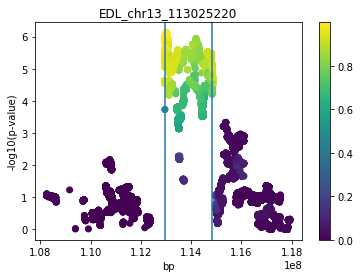

In [19]:
    f = "/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/EDL_chr13_113025220_r2.txt"
    baseF = f.split("/")[-1]
    tokens = baseF.split("_")
    pheno = tokens[0]
    chrm = tokens[1]
    bp = tokens[2]
    
    zFile = z_dir+"/"+pheno+".combined.assoc.txt.gz"
    title = pheno+"_"+chrm+"_"+str(bp)
    outFile = ld_dir+"/"+title+".pdf"
    
    print(pheno, bp)
    ci_qtl = ci[(ci["phenotype"]==pheno) & (ci["bp"]==int(bp)) ]
    print()
    print(ci_qtl.index)
    i = ci_qtl.index[0]
    start_ci = ci.loc[i, "from.bp"]
    end_ci = ci.loc[i, "to.bp"]
    if math.isnan(ci.loc[i, "start_ci"]):
        plot_locus_ci(f, zFile, title, outFile)
    else:
        plot_locus_ci(f, zFile, title, outFile, start_ci, end_ci)

In [48]:
    f = "/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA/EDL_chr13_113025220_r2.txt"
    baseF = f.split("/")[-1]
    tokens = baseF.split("_")
    pheno = tokens[0]
    chrm = tokens[1]
    bp = tokens[2]
    
    zFile = z_dir+"/"+pheno+".combined.assoc.txt.gz"
    title = pheno+"_"+chrm+"_"+str(bp)
    outFile = ld_dir+"/"+title+".pdf"
    
    print(pheno, bp)
    ci_qtl = ci[(ci["phenotype"]==pheno) & (ci["bp"]==int(bp)) ]
    print()
    print(ci_qtl.index)
    i = ci_qtl.index[0]
    
    
    start_ci = ci.loc[i, "from.bp"]
    end_ci = ci.loc[i, "to.bp"]
    if math.isnan(ci.loc[i, "from.bp"]):
        plot_locus_ci(f, zFile, title, outFile)
    else:
        plot_locus_ci(f, zFile, title, outFile, start_ci, end_ci)

EDL 113025220

Int64Index([84], dtype='int64')


<Figure size 432x288 with 0 Axes>

In [25]:
math.isnan(ci.loc[4, "fine.bp"])

True

# Welcome Trust Credible sets

In [16]:
def plot_locus_cred_set(ldFile, zFile, title, outFile,  start, end, credFile):
    ld = pd.read_table(ldFile)
    z = pd.read_table(zFile, index_col=1)
    snps = set(ld["snp1"]).intersection(set(z.index))
    ld.index = ld["snp1"]
    ld = ld.loc[snps, :]
    z = z.loc[snps, :]
    z["logp"] = -np.log10(z["p_wald"])
    z["rsquare"] = ld["rsquare"]
    z["mb"] = z["ps"]/1000000
    
    cred = pd.read_table(credFile)
    cred.index = cred["SNP"]
    cred = cred.loc[snps,:]
    cred["inCredible"].fillna(value=0, inplace=True)
    z["cred"] = cred["inCredible"]
    
    minX = min(z["mb"]-.01)
    maxX = max(z["mb"]+.01)
    maxY = max(z["logp"]+.01)
    
    fig, axes = plt.subplots(1, 2)
    
    ax=axes[0]
    sub = z[z["cred"]==0]
    ax.scatter("mb", "logp", c="rsquare", data=sub, vmin=0, vmax=1)
    ax.set_xlabel("Position (MB)")
    ax.set_ylabel("-log10(p-value)")
    ax.set_title("Not in credible set")
    if not math.isnan(start):
        ax.axvline(x=start/1000000)
        ax.axvline(x=end/1000000)
    ax.set_xlim(left=minX, right=maxX)
    ax.set_ylim(bottom=0, top=maxY)
    
    ax=axes[1]
    sub = z[z["cred"]==1]
    s = ax.scatter("mb", "logp", c="rsquare", data=sub, label="Credible set", vmin=0, vmax=1)
    ax.set_xlabel("Position (MB)")
    ax.set_ylabel("-log10(p-value)")
    ax.set_title("Credible set")
    if not math.isnan(start):
        ax.axvline(x=start/1000000)
        ax.axvline(x=end/1000000)
    ax.set_xlim(left=minX, right=maxX)
    ax.set_ylim(bottom=0, top=maxY)
    
    fig.colorbar(s, ax = ax)
    
    #plt.xlabel("Position (MB)")
    #plt.ylabel("-log10(p-value)")
    #plt.title(pheno+"_"+chrm+"_"+str(bp))
    fig.tight_layout()
    plt.savefig(outFile)
    plt.clf()

In [3]:
z_dir="/u/home/j/jzou1115/project-zarlab/CFW/MegaAnalysis_CFW_2019_Summary_Statistics/COMBINED"
ld_dir="/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/ld_NA"
ld_files = glob.glob(ld_dir+"/*_r2.txt")
cred_dir ="/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/wellcome_trust"
ci = pd.read_table("/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/output2/confidence_intervals/CI_pruned.txt")
ci = ci[ci["quantile"]==.95]

In [18]:
for f in ld_files:

    baseF = f.split("/")[-1]
    tokens = baseF.split("_")
    pheno = tokens[0]
    chrm = tokens[1]
    bp = tokens[2]
    
    zFile = z_dir+"/"+pheno+".combined.assoc.txt.gz"
    title = pheno+"_"+chrm+"_"+str(bp)
    outFile = cred_dir+"/"+title+".pdf"
    credFile = cred_dir+"/"+pheno+"_"+chrm+"_"+bp+"_output.txt"

    if os.path.isfile(outFile):
        continue

    print(title)
    
    ci_qtl = ci[(ci["phenotype"]==pheno) & (ci["bp"]==int(bp)) ]

    i = ci_qtl.index[0]
    start_ci = ci.loc[i, "from.bp"]
    end_ci = ci.loc[i, "to.bp"]
    plot_locus_cred_set(f, zFile, title, outFile, start_ci, end_ci, credFile)

gastroc_chr11_88973192
bmd_chr5_23814155
TA_chr11_88973232
glucose_chr1_152192170
soleus_chr13_113404971
tibia_chr12_83514944
activity30_chr13_8139647
tibia_chr5_39698535
soleus_chr3_16454507
gastroc_chr11_79954876
bmd_chr15_86382123
soleus_chr6_18123198
gastroc_chr12_83517483
weight_chr17_37094289
tail.length_chr8_79338858
activity.middle_chr9_81879809
tibia_chr6_145481081
EDL_chr2_77669072
tibia_chr6_148328439
tibia_chr11_97100102
bmd.a_chr11_96913720


/u/home/j/jzou1115/project-ernst/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


bmd_chr5_21721308


/u/home/j/jzou1115/project-ernst/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


bmd.a_chr11_94882898


/u/home/j/jzou1115/project-ernst/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


EDL_chr2_80039850


/u/home/j/jzou1115/project-ernst/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


bmd_chr11_94772022


/u/home/j/jzou1115/project-ernst/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


weight.bmi.tibia_chr2_153707637


/u/home/j/jzou1115/project-ernst/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


activity.end_chr11_96653605


/u/home/j/jzou1115/project-ernst/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


activity.total_chr13_10144490


/u/home/j/jzou1115/project-ernst/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


weight.bmi.tibia_chr13_8924722


/u/home/j/jzou1115/project-ernst/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


weight_chr13_9217096


/u/home/j/jzou1115/project-ernst/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


weight.bmi.tibia_chr13_5655594


/u/home/j/jzou1115/project-ernst/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


basal.activity_chr11_96816215


/u/home/j/jzou1115/project-ernst/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


activity.total_chr11_96653605


/u/home/j/jzou1115/project-ernst/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


activity.begin_chr2_153696216


/u/home/j/jzou1115/project-ernst/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


activity.begin_chr11_96964818


/u/home/j/jzou1115/project-ernst/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


activity.end_chr13_10746304


/u/home/j/jzou1115/project-ernst/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


EDL_chr13_113025220


/u/home/j/jzou1115/project-ernst/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>